In [8]:
import numpy as np
import numpy.random
import matplotlib as mp
import matplotlib.animation as mpanim
import matplotlib.pyplot as plt

# for showing animation in Jupyter Notebook
import IPython.display as disp

from datetime import datetime

# Get Jupyter to import local utility/
import sys
import os
root_dir = os.path.dirname(os.getcwd())
sys.path.append(root_dir)

import utility as util

# Exercice 1

In [2]:
def g1(x):
    return x * x / 5- 0.4 * x - 0.5


def plot_function(f, interval, n, axes):
    curve_x = np.linspace(interval[0], interval[1], n)
    curve_y = g1(curve_x)
    axes.plot(curve_x, curve_y)

In [3]:
def get_next_x(f, x, dx, step):
    derivative = (f(x+dx) - f(x)) / dx
    return x - derivative * step

In [25]:
x_0 = 2
n = 50
# 1 images per second
freq = 20
rect = [-1, -1, 1, 1]

dx = 0.02
step = 0.1

points, values = util.ScatterAnimationFigure.get_point_values(
    g1, 
    lambda x: get_next_x(g1, x, dx, step),
    x_0, 
    n)

scatter_anim = util.ScatterAnimationFigure(points, values)

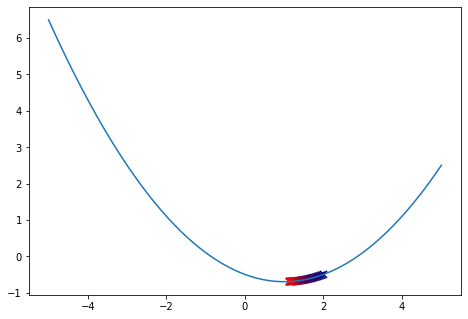

In [26]:

fig = plt.figure("ZZZ")
axes = fig.add_axes(rect)

plot_function(g1, [-5, 5], 200, axes)

anim = scatter_anim.plot(axes)


plt.show(fig)


# Exercice 2

In [27]:

# SPYDER 
# Tools > Preferences > IPython Console > Graphics > Backend 
# change it from "Inline/En ligne" to "Automatic".
 
cm = plt.cm.RdBu

def g2(u):
    x = u[0]
    y = u[1]
    return x * x + 0.4 * y * y + 0.2 * x - 0.2 * x * y + 0.1;

def plot_function_2d(f, interval_x, interval_y, n, axes):
    x = np.linspace(interval_x[0], interval_x[1], n)
    y = np.linspace(interval_x[0], interval_y[1], n)
    x_grid, y_grid = np.meshgrid(x, y)
    grid = [x_grid, y_grid]
    z = f(grid)
    axes.contourf(*grid, z)

In [28]:
def get_next_point(f, point, dpoint, step):
    n = len(point)
    value = f(point)
    derivative = np.empty(n)
    for i in range(n):
        point_dpoint = np.copy(point)
        dx = dpoint[i]
        point_dpoint[i] = point_dpoint[i] + dx
        derivative[i] = (f(point_dpoint) - value) / dx
    return point - derivative * step

In [29]:
interval = [-5, 5]

point_0 = np.random.rand(2) * interval
n = 50
# 1 images per second
freq = 20
rect = [-1, -1, 1, 1]

dpoint = [0.02] * 2
step = 0.1

points, values = util.ScatterAnimationFigure.get_point_values(
    g2, 
    lambda point: get_next_point(g2, point, dpoint, step),
    point_0, 
    n)

scatter_anim = util.ScatterAnimationFigure(points, values)

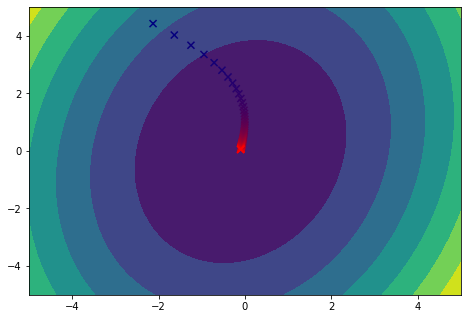

In [30]:
fig = plt.figure()
axes = fig.add_axes(rect)

plot_function_2d(g2, interval, interval, n, axes)

anim = scatter_anim.plot(axes)


plt.show(fig)


# Exercice 3

In [31]:
def g3(u):
    x = u[0]
    y = u[1]
    v1 = x*x + 0.4*y*y + 0.1
    v2 = 3 * x + 2 * y + 0.2
    return np.maximum(v1,v2)

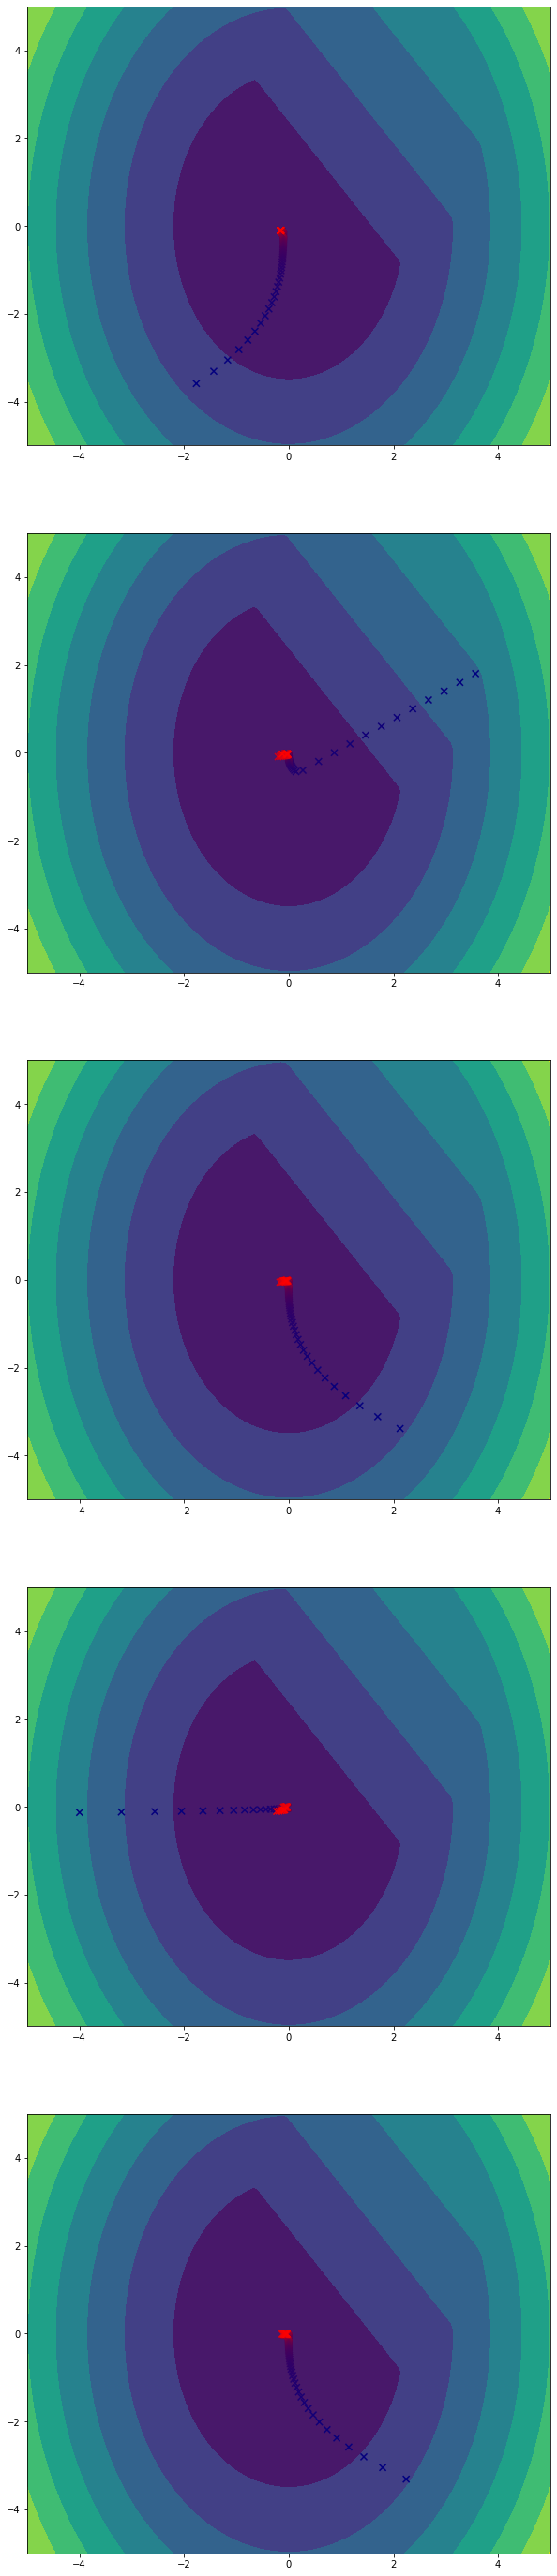

In [41]:
q = 5

    
n = 100
# 1 images per second
freq = 20
rect = [-1, -1, 1, 1]

interval = [-5, 5]

dx = [0.01] * 2
step = 0.1

fig = plt.figure(figsize=(10, 10 * q))



for k in range(q):
    axes = fig.add_subplot(q, 1, k + 1)
    
    plot_function_2d(g3, interval, interval, n, axes)

    anim = scatter_anim.plot(axes)
    
    angle = np.random.uniform(0,628) / 100
    x = 4 * np.cos(angle)
    y = 4 * np.sin(angle)
    point_0 = [x, y]
    #
    points, values = util.ScatterAnimationFigure.get_point_values(
        g3, 
        lambda x: get_next_point(g3, x, dx, step),
        point_0, 
        n)

    scatter_anim = util.ScatterAnimationFigure(points, values)    
    
    
plt.show(fig)
